In [1]:
import pandas as pd 
import numpy as np
from IPython.display import Image, display
from os import listdir
from os.path import isfile, join

# Paths

In [7]:
img_dir = "../frontend/public/mlimages/"

In [8]:
indices_path = "../data/tl_nhood/indices_euclidean.csv"

In [9]:
distances_path = "../data/tl_nhood/distances_euclidean.csv"

# Load images and data

In [14]:
def load_img_names(path):
    """ Returns list of img names on specified path
    """
    images = [f for f in listdir(path) if isfile(join(path, f)) and join(path, f).endswith(".jpg")]
    df = pd.DataFrame(images)
    df.columns = ["img"]
    df = df.sort_values("img")
    return df["img"].values

In [15]:
img_lst = load_img_names(img_dir)
img_lst[:10]

array(['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg',
       '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg',
       '000008.jpg', '000009.jpg'], dtype=object)

In [7]:
indices = np.genfromtxt(indices_path, delimiter=',',dtype=str)

In [8]:
distances = np.genfromtxt(distances_path, delimiter=',',dtype=str)

# Methods

In [9]:
def get_img_map(img_names):
    """ Maps ordererd integer values to image names, example img  2 > 000002.jpg, 45 > 000045.jpg
    """
    img_map = {}
    for i in range(0,len(img_names)):
        img_map[i] = img_names[i]
    return img_map

In [10]:
img_map = get_img_map(img_lst)

In [11]:
def get_key(dic, dic_val):
    """ Returns key for value in dictionary
    """
    for k, v in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if v == dic_val:
            return k

In [12]:
# get_key(img_map,"000000.jpg")

In [13]:
def get_similar_imgs(img_name, img_map, indices, distances,k, form ="df",img_dir=None):
    """ Returns list or df of k similar images, with or without path 
        Parameters: 
        1. img_name - "00001.jpg"
        2. img_map = {'0': '000000.jpg'}
        3. indices - nested np array with top 50 closest images for each image
        4. distances - nested np array with top 50 distances for each image
        5. k - 10 (number of images to be returned)
        6. form - returning df or list
        7. img_dir - path to directory of images
    """
    index = get_key(img_map, img_name)
    distances = distances[index][1:k+1]
    
    if img_dir == None:
        images = [x for x in indices[index]]
    else: 
        images = [img_dir+x for x in indices[index]]       
    
    images = images[1:k+1]
        
    if form == "df":
        return pd.DataFrame({"img": images,"dist": distances})
    elif form == "list": 
        return images

In [14]:
# get_similar_imgs("000123.jpg", img_map,indices, distances, 10, form="list", img_dir="patka/")

In [15]:
def get_relevant_imgs(img_lst, img_map, indices, distances,k, form="list", rank=True, img_dir=None):
    """ Returns list or df of k similar images, with or without path 
        Parameters: 
        1. img_names - ["00001.jpg","00002.jpg"]
        2. img_map = {'0': '000000.jpg'}
        3. indices - nested np array with top 50 closest images for each image
        4. distances - nested np array with top 50 distances for each image
        5. k - 10 (number of images to be returned)
        6. form - returning df or list
        7. img_dir - path to directory of images
        8. rank - return ranked by distance or not
    """
    df_lst = []
    for img in img_lst:
        df_lst.append(get_similar_imgs(img, img_map, indices, distances, k, img_dir=img_dir))
    
    df = pd.concat(df_lst)
    if rank:
        df = df.sort_values("dist")
    else:
        df = df.sample(k)
    if form == "list":
        return df.head(k)["img"].values
    elif form == "df":
        return df.head(k)

In [16]:
def display_img(img_dir, img):
    """ Displays an image
    """
    display(Image(img_dir+img))

In [17]:
def display_imgs(img_dir,img_list):
    """ Displays images from the list
    """
    for img in img_list:
        display_img(img_dir, img)

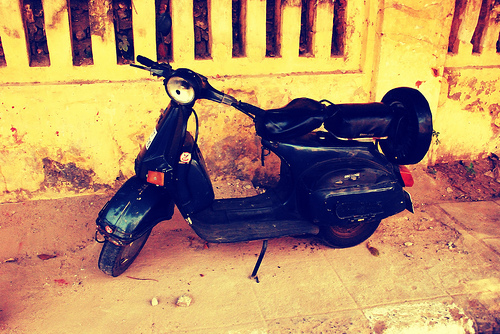

In [18]:
display_img(img_dir, "000313.jpg")

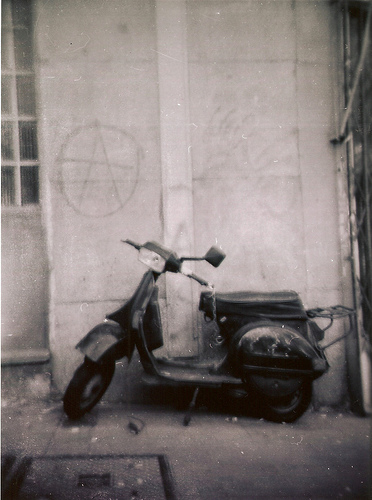

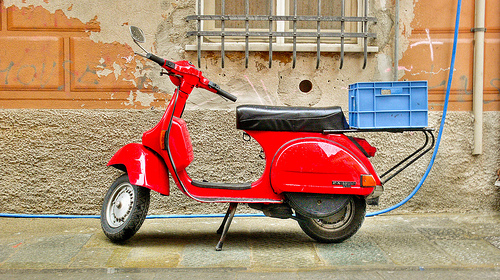

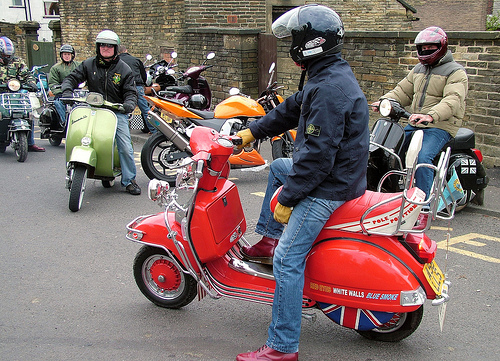

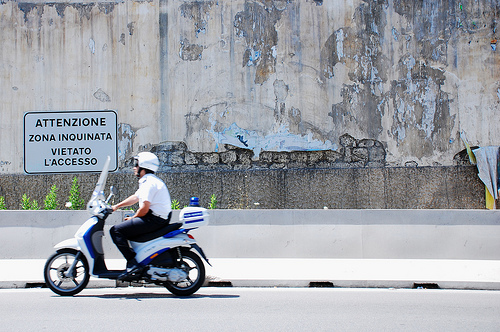

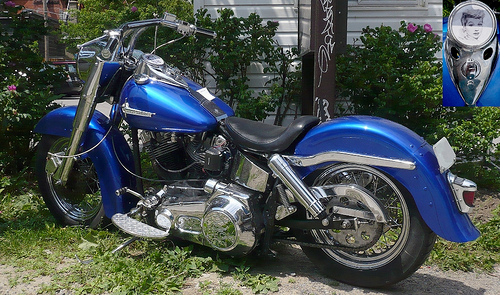

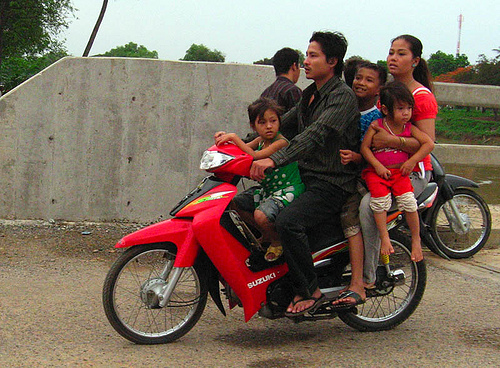

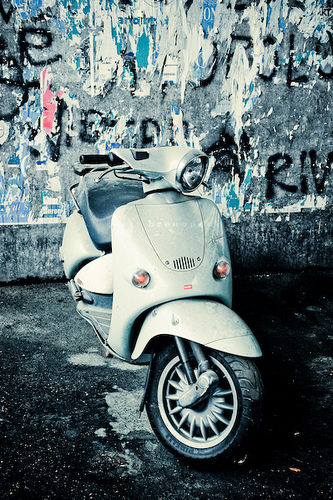

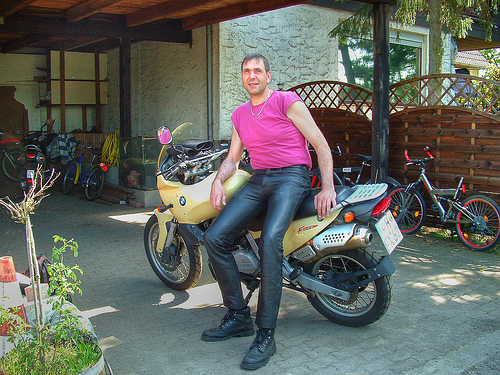

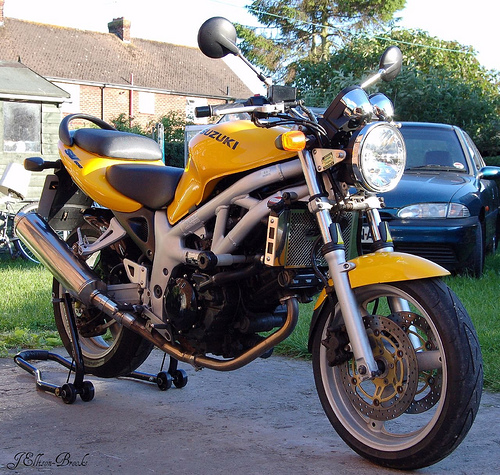

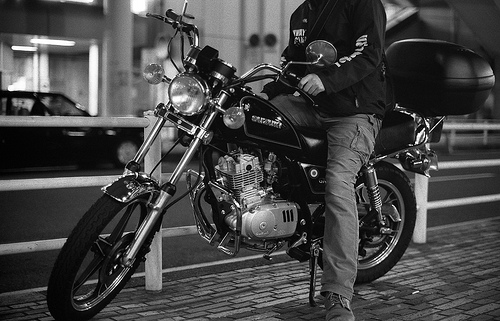

In [19]:
display_imgs(img_dir, get_similar_imgs("000313.jpg", img_map,indices, distances, 10, form="list", img_dir=None))

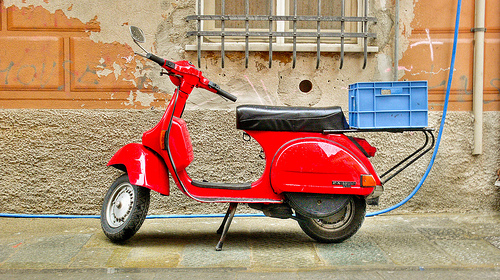

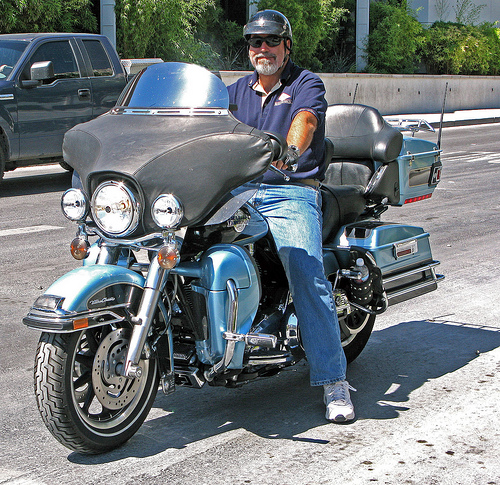

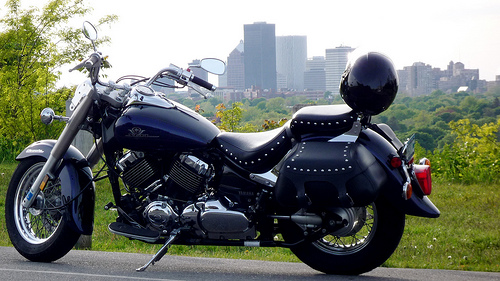

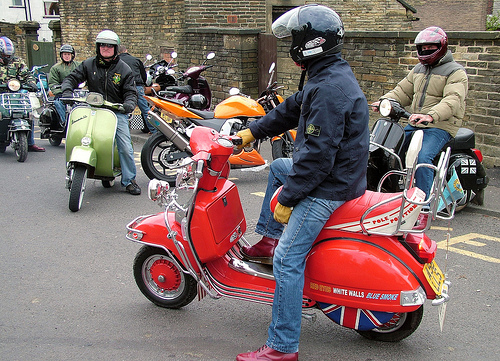

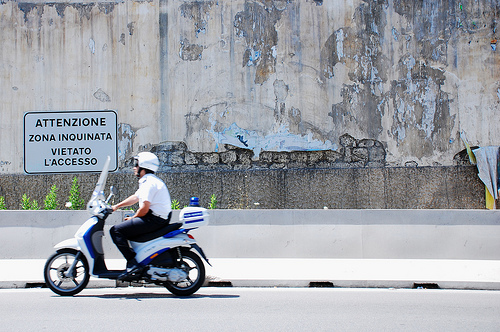

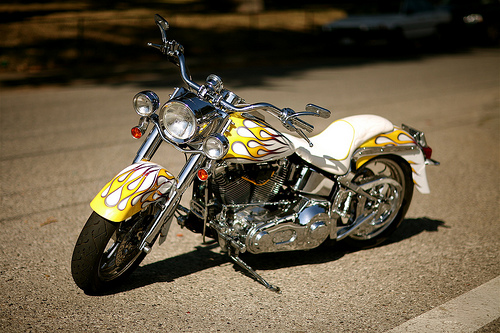

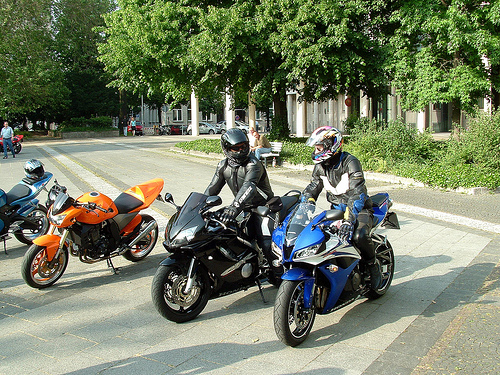

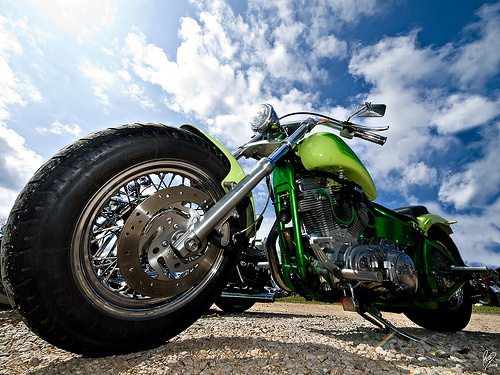

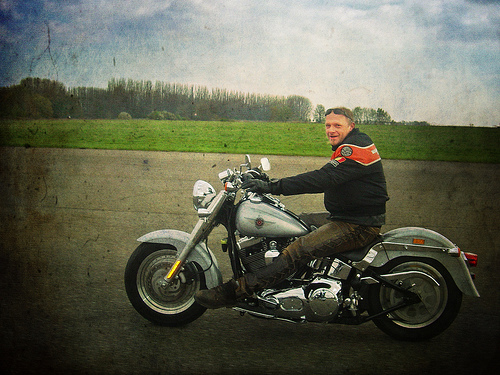

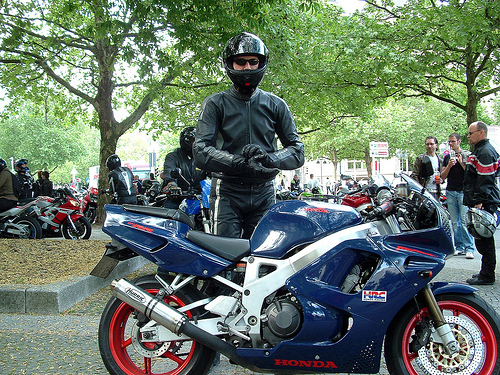

In [20]:
img_lst = ["000313.jpg","000614.jpg","001093.jpg"]
display_imgs(img_dir,get_relevant_imgs(img_lst,img_map, indices,distances,10))